### Importing the necessary Library

In [454]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [455]:
# titanic_train = pd.read_csv("train.csv")
# titanic_test = pd.read_csv("test.csv")

In [546]:
titanic_train = pd.read_csv("titanic.csv")

In [547]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [548]:
titanic_train.shape

(891, 12)

In [549]:
titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Exploratory Data Analysis

#### It is super important to have a look at our dataset and understand our data before Train and test our Model.

### Checking the number of people of who were Alive / Dead

In [550]:
titanic_train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

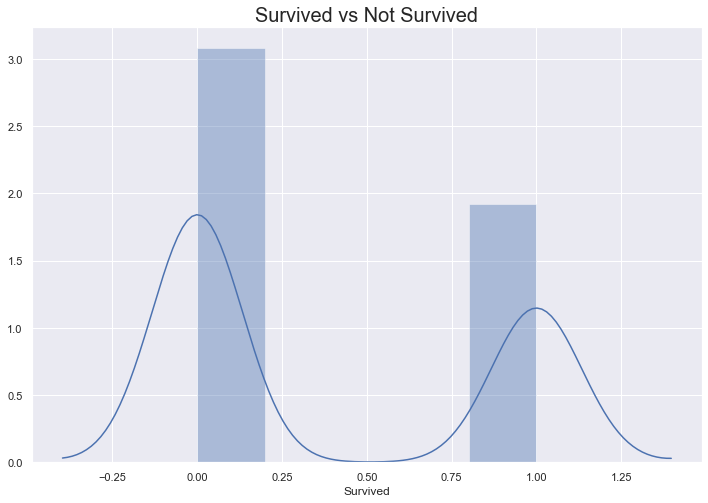

In [551]:
sns.set(rc={'figure.figsize':(12,8)})
sns.distplot(titanic_train['Survived'])
plt.title("Survived vs Not Survived", fontsize=20)
plt.show()

In [552]:
titanic_train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

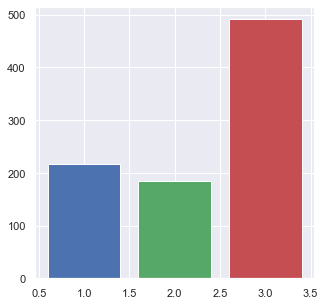

In [553]:
plt.figure(figsize=(5,5))
plt.bar(list(titanic_train['Pclass'].value_counts().keys()),list(titanic_train['Pclass'].value_counts()), color =['r','b','g'])
plt.show()

### Blue stands for 1 class
### Green standns for 2 class
### Red stands for 3 class

In [554]:
titanic_train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

### Checking for the number of Males and Females

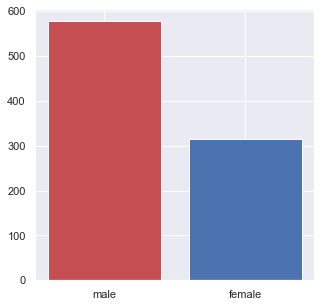

In [555]:
plt.figure(figsize=(5,5))
plt.bar(list(titanic_train['Sex'].value_counts().keys()),list(titanic_train['Sex'].value_counts()), color =['r','b'])
plt.show()

### Checking the distribution of Age 

/Users/adityagavali/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/adityagavali/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


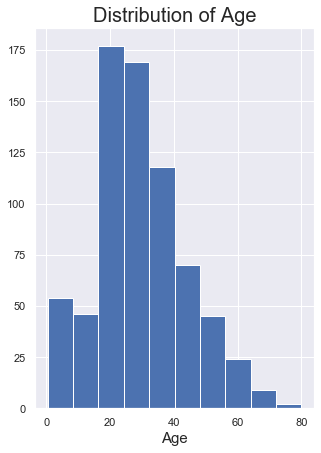

In [556]:
plt.figure(figsize=(5,7))
plt.hist(titanic_train['Age'])
plt.title("Distribution of Age", fontsize =20)
plt.xlabel("Age", fontsize=15)
plt.show()

### The correlation matrix also helps us understand the relationship between the variables to avoid multicollinearity. This could be useful for us to understand our features and it's importance

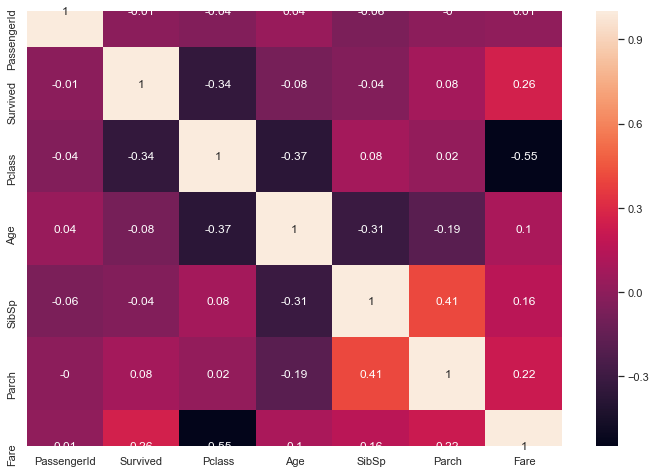

In [557]:
correlation_matrix = titanic_train.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

### Preparing our data

In [558]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [559]:
titanic_train['Embarked'].replace(to_replace=['Q','C' ,'S'], value = [0,1,2], inplace = True)

In [560]:
titanic_train['Sex'].replace(to_replace=['female','male'], value = [0,1], inplace = True)

In [561]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2.0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2.0


### Looking for null values

In [562]:
titanic_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Dropping all our null values will lose information that is valuable hence we treat the null value by replacing the null values with the mean of the Age column

In [563]:
print(titanic_train['Age'].mean())
titanic_train['Age'] = titanic_train['Age'].replace(np.nan, titanic_train['Age'].mean())
titanic_train.isnull().sum()

29.69911764705882


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [564]:
del titanic_train['Ticket']
del titanic_train['PassengerId']
del titanic_train['Name']
del titanic_train['Cabin']

In [565]:
titanic_train.dropna(inplace=True)
titanic_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

### Now that our Model is prepared we can train and test the data with the help of Sklearn and it's capabilities to train_test_split the data

In [566]:
from sklearn.model_selection import train_test_split

def split_data(dataframe, seed=None, percentage =0.8):
    
    x = dataframe.loc[:, dataframe.columns != 'Survived']
    y = dataframe['Survived']
    
    return train_test_split(x, y, test_size = 1-percentage, random_state =0)

In [567]:
x_train, x_test, y_train, y_test = split_data(titanic_train, seed = 0)

### It's Time to Model our data after splitting it.
#### As we have to predict the Target variable "Survived" on the basis of our other independent variables we are going to use Logistic Regression as it's a Categorical Variable. 

In [568]:
from sklearn import linear_model

model = linear_model.LogisticRegression(max_iter= 100, solver = 'liblinear')
model.fit(x_train, y_train)

# We are predicting the probabilities given to each sample in the test test with the help of 'predict_proba'.
probs = model.predict_proba(x_test)[:,1]

# Gathering the probabilities for the Survived target Column
predictions = pd.DataFrame({'Survived':y_test, 'pred':probs})
predictions.head()

,Survived,pred
14,0,0.724094
159,0,0.011449
763,1,0.874289
741,0,0.321897
483,1,0.314238


### Our Model gives t=us the probabilities for each of the two classes. So next we have to decide on the threshold we can assume to say that a given probability is larger than the threshold or not.

#   

### THE ROC CURVE

The ROC shows us the trade off between the True Positive rates and the False Positives Rates. The Classifier that give curves close to the top left corner (45-Degree Diagonal) indicates a better performance.

#  

###  Confusion Matrix
By creating a matrix we can possibly set a threshold to 50% at the beginning and all the predictions made by our mdoel above 50% will be considered that the passenger survived. The figure shows the confusion matrix

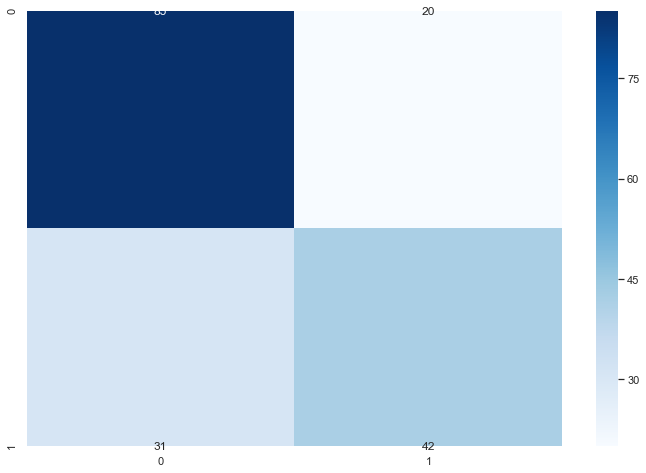

In [569]:
from sklearn. metrics import confusion_matrix
thrshold = 0.5

cm = confusion_matrix(predictions.Survived, [pred> thrshold for pred in predictions.pred])
sns.heatmap(cm, annot=True, cmap = plt.cm.Blues);

### From the Matrix above we can subtly see the difference between the True positives and the true negatives

Fucntion to calculate the True Positive Rate

In [570]:
def tpr(predictions, thrshold):
    cm = confusion_matrix(predictions.Survived, [pred>thrshold for pred in predictions.pred])
    return cm[1,1]/sum(cm[1,:])

In [571]:
print(f"TPR = {tpr(predictions, thrshold)}")

TPR = 0.5753424657534246


Fucntion to calculate the True Positive Rate

In [572]:
def fpr(predictions, thrshold):
    cm = confusion_matrix(predictions.Survived, [pred>thrshold for pred in predictions.pred])
    return cm[0,1]/sum(cm[0,:])

In [573]:
print(f"FPR = {fpr(predictions, thrshold)}")

FPR = 0.19047619047619047


Creating the fucntion to calculate the penalty for false positives and false negatives

In [574]:
def cost(predictions, thrshold, fp_cost =1, fn_cost=2):
    cm = confusion_matrix(predictions.Survived, [pred > thrshold for pred in predictions.pred])
    return cm[0,1] * fp_cost + cm[1,0] * fn_cost 

In [575]:
print("Cost = {}".format(cost(predictions, thrshold)))

Cost = 82


### Build the ROC Curve

In [576]:
from sklearn.metrics import roc_auc_score, roc_curve

fpr, tpr, thrshold = roc_curve(predictions.Survived, predictions.pred)

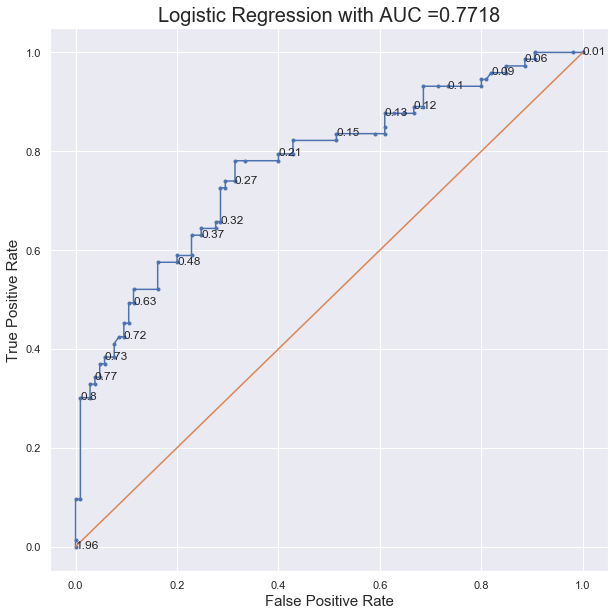

In [577]:
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, marker= '.')
for x,y ,txt in zip(fpr[::4], tpr[::4], thrshold[::4]):
    
    plt.annotate(np.round(txt,2), (x, y-0.004))
plt.plot(np.linspace(0,1,10), np.linspace(0,1,10), label="diagonal")
#axis labels
plt.title('Logistic Regression with AUC ={0:.4f}'.format(roc_auc_score(predictions.Survived, predictions.pred)), fontsize=20)
plt.xlabel('False Positive Rate', fontsize=15)
plt.ylabel('True Positive Rate', fontsize=15)
# show the plot
plt.show()

### Double Density Plot

Double Density Plot is an alternative to the ROC curve. It plots the distribution of the data over a continuous interval. The peaks helps us to visualise the values according to the bins.

In [578]:
from importlib import reload
reload(plt)

<module 'matplotlib.pyplot' from '/Users/adityagavali/opt/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

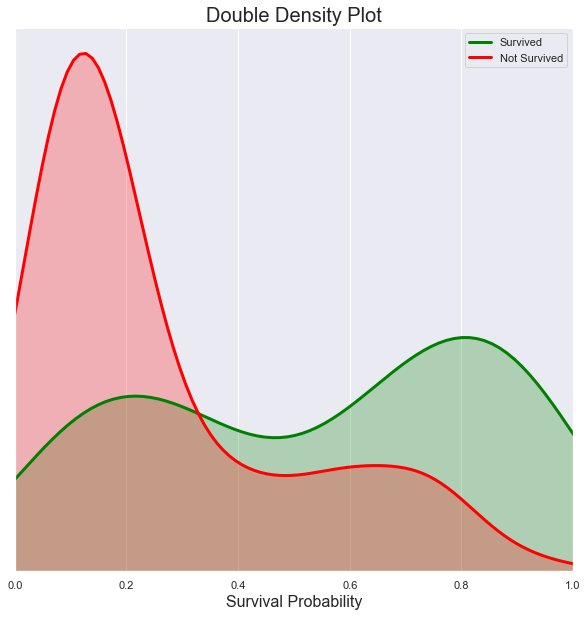

In [579]:
plt.figure(figsize=(10,10))
plt.yticks([])
plt.xlim((0,1))
plt.xlabel("Survival Probability", fontsize=16)
plt.title("Double Density Plot", fontsize=20)
sns.distplot([p for label, p in predictions.values if label == 1.0], hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 3, 'kernel': 'gau'}, label = "Survived", color='Green')
sns.distplot([p for label, p in predictions.values if label == 0.0], hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 3, 'kernel': 'gau'}, label = "Not Survived", color='Red');

#   

## Homework